# Descriptive Statistics Review

In this second part of the lab, we are going to continue working with the data that we cleaned in the last part. 
Be sure to continue to write clean code and comment your work well!

First, lets import our libraries and the data we saved. 

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
diamonds = pd.read_csv('/Users/rickardramhoj/ironhack_assignments/M2-mini-project1/diamonds_clean.csv')
diamonds = diamonds.drop('Unnamed: 0', axis=1)

Now that we cleaned our data, we can proceed with some exploratory analysis. We will analyze the features that affect price the most.

Let's start by looking at how the charateristics of a diamond (especially the price, since that's our focus) change based on its color. Remember that you can use the `groupby()` method in pandas. 

**Using the `describe()` method, take a look on the dataset paying special attention to the variability. Comment what you see.**

In [3]:
#your code here

# describe
diamonds.describe()

,carat,color,clarity,depth,table,price,x,y,z
count,53933.000000,53933.000000,53933.000000,53933.000000,53933.000000,53933.000000,53933.000000,53933.000000,53933.000000
mean,0.797884,3.405800,4.051063,61.749333,57.457002,3932.155026,5.731901,0.797702,0.797934
std,0.473983,1.701151,1.647118,1.432501,2.234052,3988.700283,1.119932,0.474093,0.474092
min,0.200000,0.000000,1.000000,43.000000,43.000000,326.000000,0.000000,-3.499515,0.200000
25%,0.400000,2.000000,3.000000,61.000000,56.000000,950.000000,4.710000,0.400000,0.400000
50%,0.700000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,0.700000,0.700000
75%,1.040000,5.000000,5.000000,62.500000,59.000000,5324.000000,6.540000,1.040000,1.040000
max,5.010000,6.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,4.557710,5.010000


In [ ]:
#your comments here

# There is a lot of variation in the "price" specifically

Let's proceed to check each feature separately. 

**Before starting, which features do you think that will affect the price most and why? You will contrast your hypotheses with your results.**

In [ ]:
#your hypotheses here

# Based on my limited knowledge of diamonds, I would expect the carat would be most important, followed by cut, clarity and color. All of these are factors that make the diamond more valuable. 

## 1. The `color` column
First, let's look at the color column.

**For each different color, find the mean of each column. You should have a matrix with every color as rows and the columns `carat`, `clarity`, etc as columns.**

In [4]:
#your code here

diamonds.groupby("color").mean()

,carat,clarity,depth,table,price,x,y,z
color,,,,,,,,
0,1.162137,3.776353,61.887215,57.812393,5323.818020,6.519338,1.161601,1.162137
1,1.026927,3.964035,61.846385,57.577278,5091.874954,6.222826,1.026742,1.026927
2,0.911627,3.933871,61.836557,57.518176,4484.958805,5.984776,0.911230,0.911627
3,0.771088,4.463419,61.757449,57.288060,3998.145173,5.678549,0.771088,0.771088
4,0.736544,4.134382,61.694078,57.432998,3725.220755,5.616138,0.736544,0.736544
5,0.657867,3.969889,61.662090,57.491201,3076.752475,5.411580,0.657457,0.658139
6,0.657715,3.691025,61.698066,57.404355,3168.106436,5.417851,0.657715,0.657715


**What do you see? Pay special attention to the relationship between price and color.**

In [ ]:
#your thoughts here

# on visual inspection, there seems to be a correlation between price and color

Let's go further into the color feature. We will plot the frequency distribution of the diamonds color in our dataset. 

**Plot the distribution and analyze it. Remember that you can use the pandas `plot()` method.**

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,5,2,61.5,55.0,326,3.95,0.23,0.23
1,0.21,Premium,5,3,59.8,61.0,326,3.89,0.21,0.21
2,0.23,Good,5,5,56.9,65.0,327,4.05,0.23,0.23
3,0.29,Premium,1,4,62.4,58.0,334,4.20,0.29,0.29
4,0.31,Good,0,2,63.3,58.0,335,4.34,0.31,0.31


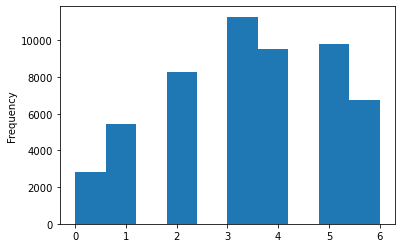

In [22]:
#your code here

# display histogram using .hist()
diamonds["color"].plot.hist()

diamonds.head()

In [ ]:
#your comments here

# There are most values with color 3 and 4. And least for 0. 

## 2.The `carat` column 

Let's check the `carat` (weight), since this could also be a potential factor for price change.

**Find the mean of each column for each value of `carat` using the `groupby` method. Then comment your results.**

In [18]:
#your code here
diamonds.groupby("carat").agg("mean")

,color,clarity,depth,table,price,x,y,z
carat,,,,,,,,
0.20,5.166667,3.833333,61.100000,59.333333,365.166667,3.786667,0.200000,0.20
0.21,5.444444,3.666667,60.511111,58.444444,380.222222,3.874444,0.210000,0.21
0.22,4.800000,3.600000,61.620000,60.400000,391.400000,3.898000,0.220000,0.22
0.23,4.518771,5.901024,61.426621,58.034130,486.143345,3.946382,0.230000,0.23
0.24,4.185039,5.972441,61.599213,57.488189,505.185039,3.990157,0.240000,0.24
...,...,...,...,...,...,...,...,...
4.00,1.000000,1.000000,63.300000,58.000000,15984.000000,10.010000,4.000000,4.00
4.01,0.500000,1.000000,61.750000,61.500000,15223.000000,10.080000,3.508770,4.01
4.13,2.000000,1.000000,64.800000,61.000000,17329.000000,10.000000,4.130000,4.13


In [ ]:
#your comments

# the higher the carat, the higher the price, and the color, clarity and depth. 


**Plot a histogram of the `carat` column by using the `plot` method (see the docs to find an easy way to do so). What is happening?**

<AxesSubplot:ylabel='Frequency'>

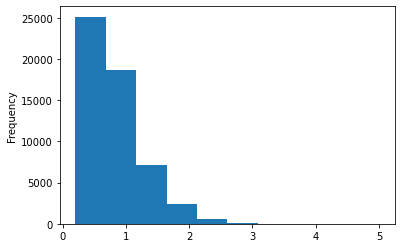

In [21]:
#your code here

diamonds["carat"].plot.hist()

# comments

# The lower carats are the most frequent

# 3. The `table` and `clarity` column
Finally, let's check the `table`.

**Find the mean of each column for each value of `table` using the `groupby` method. Then comment your results.**

In [23]:
#your code here

# group the mean values by "table"
diamonds.groupby("table").agg("mean")

,carat,color,clarity,depth,price,x,y,z
table,,,,,,,,
43.0,1.0400,1.0,5.00,62.90,4997.0,6.450,1.0400,1.0400
44.0,0.2900,5.0,5.00,62.80,474.0,4.200,0.2900,0.2900
49.0,0.6500,3.0,4.00,64.25,2290.5,5.355,0.6500,0.6500
50.0,1.5100,3.0,3.00,61.50,8995.5,7.380,1.5100,1.5100
50.1,0.9400,2.0,2.00,66.00,3353.0,6.130,0.9400,0.9400
...,...,...,...,...,...,...,...,...
71.0,0.6800,3.0,3.00,58.00,1633.0,5.850,0.6800,0.6800
73.0,0.6025,4.5,4.25,68.90,2406.5,5.520,0.6025,0.6025
76.0,0.7900,3.0,3.00,65.30,2362.0,5.520,0.7900,0.7900


In [ ]:
#your comments here

# The higher the table value is, the higher carat and the color value. The connection with the price is not as clear. 

**Finally, do the same with the `clarity` column.**

In [24]:
#your code here

# group mean values by clarity
diamonds.groupby("clarity").agg("mean")

,carat,color,depth,table,price,x,y,z
clarity,,,,,,,,
1,1.283846,2.968961,62.734278,58.303779,3924.168691,6.761093,1.280463,1.283846
2,1.077601,3.470025,61.771548,57.926613,5062.255576,6.403460,1.077242,1.077601
3,0.850482,3.448450,61.853042,57.662541,3996.001148,5.888383,0.850482,0.850482
4,0.763850,3.494370,61.724249,57.418040,3924.166204,5.658633,0.763850,0.763850
5,0.727108,3.161812,61.667968,57.313966,3839.144308,5.572860,0.726617,0.727434
6,0.596202,3.569483,61.663778,57.024990,3283.737071,5.218454,0.596202,0.596202
7,0.503131,3.350848,61.624521,56.883881,2519.512315,4.961721,0.503131,0.503131
8,0.505123,3.101676,61.510615,56.507207,2864.839106,4.968402,0.505123,0.505123


In [ ]:
#your comments here

# There is quite an even distribution of the mean values based on this dimension

**After looking at your results, which features do you think will affect price the most now? Regarding your hypotheses, do they match your final results? Provide a small overview.**

In [ ]:
#your thoughts here

# The clarity does not affect the price as much as I expected it to. The carat seems to be the prime indicator of price. 

# 4. Taking a deeper look with plots and correlations

To take deeper look, we will use the `pairplot` method of `seaborn` library. This method plots a scatterplot for each pair of features and in the diagonal the distribution of the feature.

So if you have many features it will take a while, be careful!


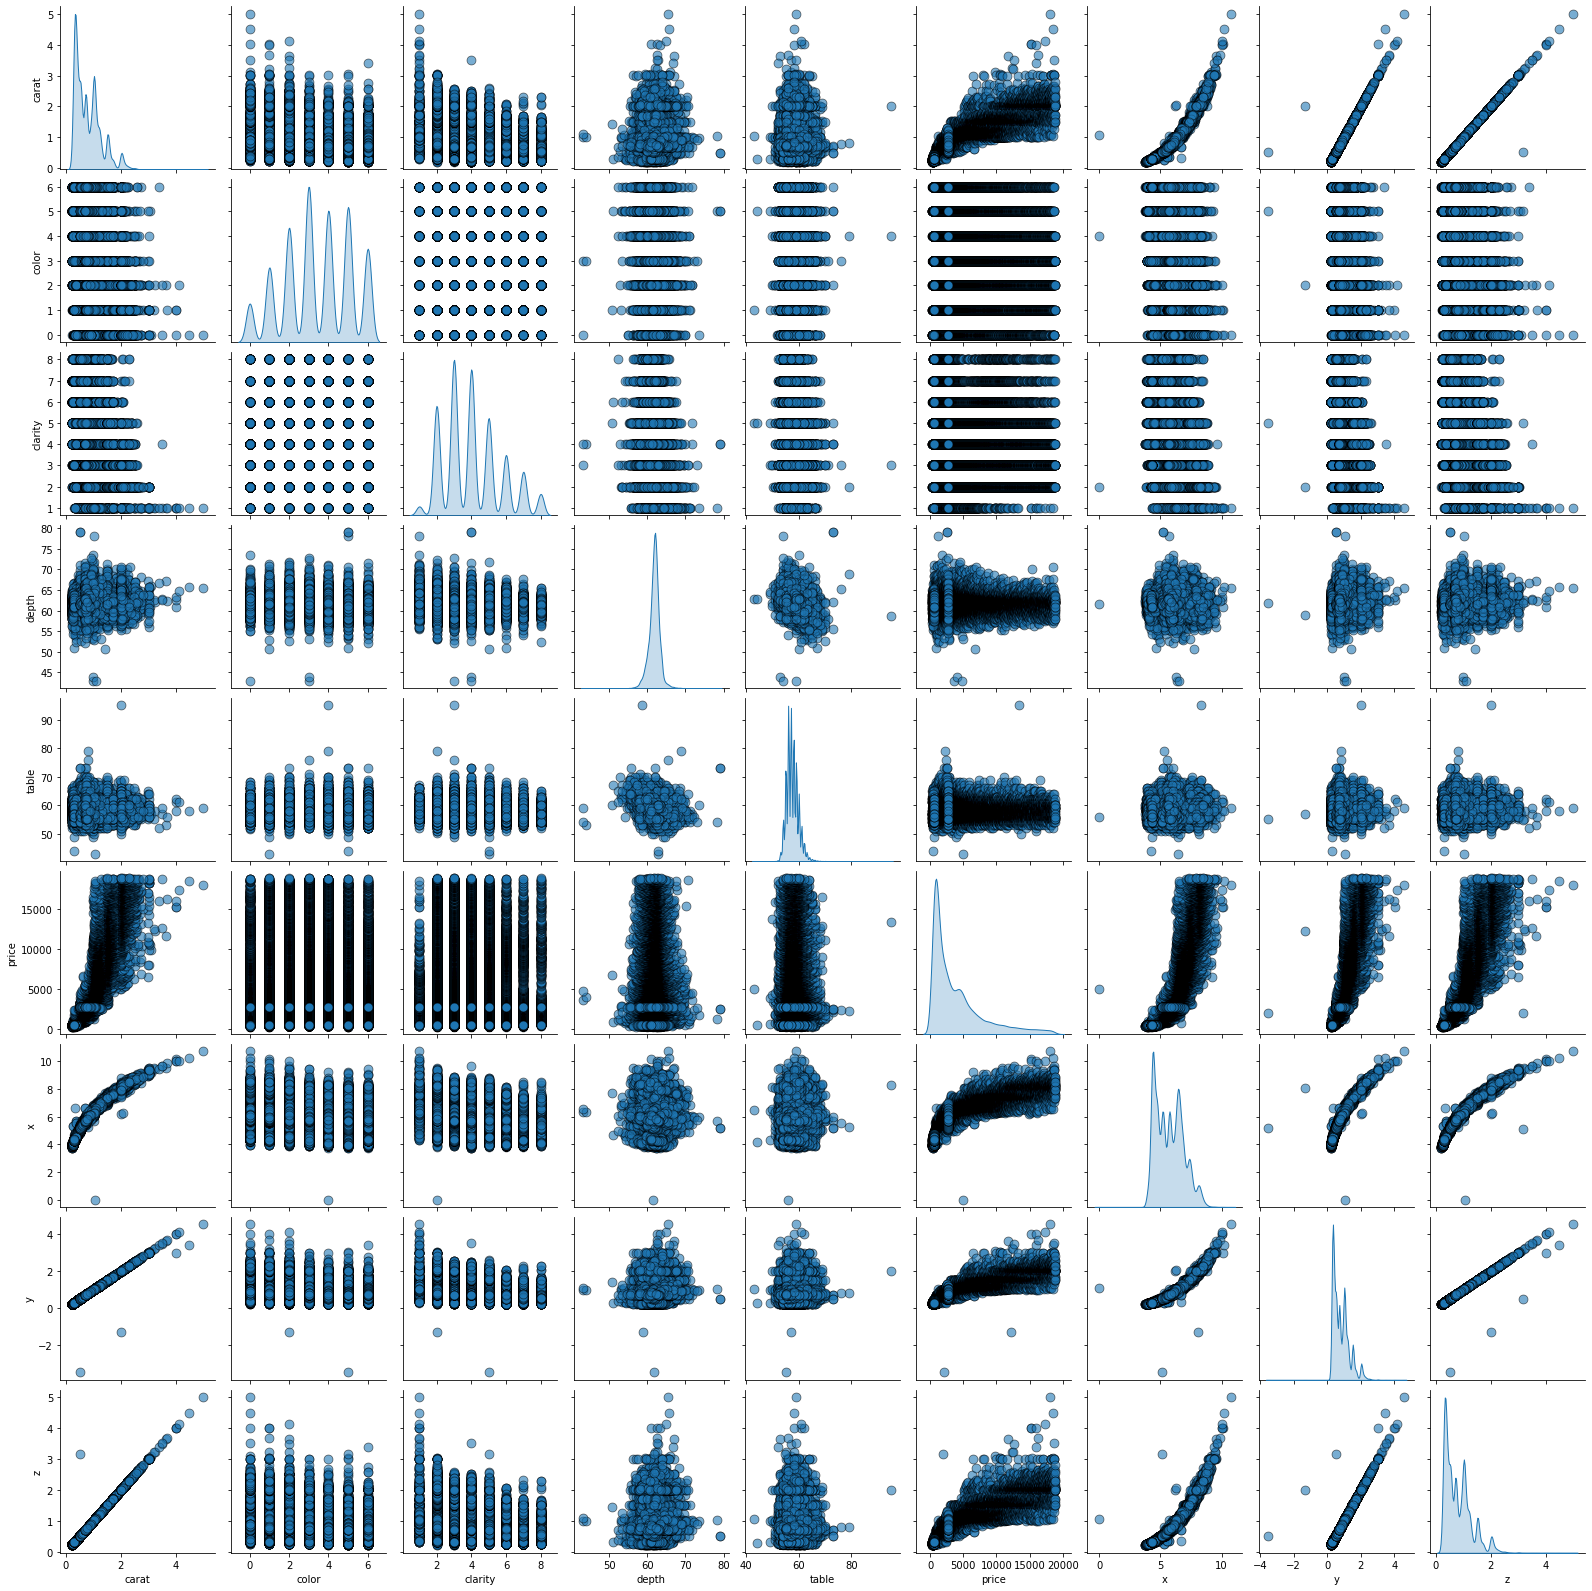

In [25]:
#Run this code
import seaborn as sns
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

**What do you see here? What relationships between variables are the most interesting?**

In [ ]:
#your thoughts here

# The relationship between carat and price is interesting, where the price gets gigher, the higher the carat
# It is also interesting to look at the physical dimensions (x,y,z) adn their relationship with price to see which dimension is most important.


Now we will see a correlation matrix with a plot. As you know a higher correlation means that the feature could be an effect (**but is not for sure**) for the changes on the price.

We will see this with a matrix with colors. A lighter color means greater correlation. 

This is done with the `seaborn` library as well.

<AxesSubplot:>

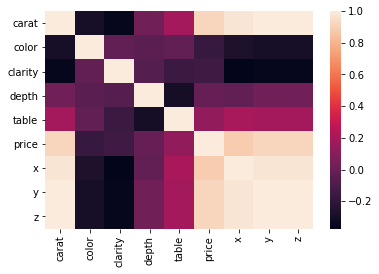

In [26]:
# your code here
 
# make a heatmap
sns.heatmap(diamonds.corr())

**What do you see here? Regarding the results before, does it fit with them?**

In [ ]:
#your thoughts here

# Yes, there is a good correlation between carat and price and the x,y,z

Finally, we will calculate the linear regression between the price and the weight. This will be done first by plotting it with the `seaborn` library and then calculating the error with the `scipy` library.

LinregressResult(slope=0.00010951619133346776, intercept=0.3672497699957608, rvalue=0.921609842509452, pvalue=0.0, stderr=1.98598226909998e-07, intercept_stderr=0.001112350035860559)

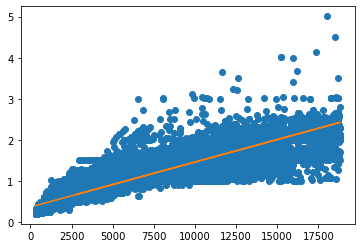

In [35]:
# your code here

# define x axis
x = diamonds["price"]

# define y axis
y = diamonds["carat"]

# plot scatter plot
plt.plot(x, y, 'o')

# create linear regression line
m, b = np.polyfit(x, y, 1)

#plot linear regression line
plt.plot(x, m*x + b)

# calculate linear regression model with scipy
stats.linregress(x, y)

**What do you think?**

In [ ]:
#your thoughts here

#There seems like there is a clear linear relationship between carat and price 

**Would you do any other checks on other features? Do you have any comments regarding `carat`?**

In [ ]:
#your thoughts here

# It looks like there is a strong correlation between x,y and z. But maybe it could be interesting to see if any of them have a statistically greater influence on the price

# There is a clear relation between carat and price. 

**Conclusion**

**From our dataset** we can conclude that although `color` and `clarity` have a classification, and thus an assigned importance or weight, they do not influence the monetary value of a diamond in determining way. While it is true that different colors or clarities may have different prices, upon closer examination those variations in price seem to be linked to `carat` (weight) and its `dimensions`. In our analysis, the key factor to determining a diamond's value was placed solely in the aforementioned features, since we can see in our correlation coefficients and in the coefficient of determination that these features are closely related.